# Ejercicio 3 - Algoritmo de Shor
## Contexto histórico

En computación, frecuentemente medimos el desempeño de un algoritmo por cómo crece el problema con el tamaño de la entrada. Por ejemplo, para la adición el algoritmo crece linealmente con el tamaño de los números a sumar. Hay algunos problemas de cómputo para los cuales los mejores algoritmos crecen _exponencialmente_ con el tamaño de la entrada, y esto significa que entradas de tamaño relativalemente modesto son demasiado grandes para ser tratadas por cualquier computadora en la Tierra. Estamos tan seguros de esto, que mucha de la seguridad de internet depende de la falta de solución a ciertos problemas. 

En 1994, Peter Shor demostró que es posible descomponer un número en sus factores primos de manera eficaz en una computadora cuántica.[1]  Estas son buenas noticias, ya que el mejor algoritmo clásico que conocemos es uno de esos algoritmos que crecen exponencialmente. De hecho, el sistema criptográfico [RSA](https://es.wikipedia.org/wiki/RSA) está basado en la inviabilidad de factorizar números lo suficientemente grandes. Factorizar números enteros muy grandes con las computadoras clásicas actuales requeriría millones de cúbits y de compuertas, y estos circuitos son excesivamente grandes para ejecutarse con éxito en las computadoras cuánticas de hoy en día. 

¡¿Cómo hicieron Lieven M.K. Vandersypen, Matthias Steffen, Gregory Breyta, Costantino S. Yannoni, Mark H. Sherwood e Isaac L. Chuang para factorizar el número 15 en una computadora cuántica, ya hace bastante tiempo, en 2001?![2]

La dificultad de recrear el algoritmo de Shor consiste en crear el circuito que calcula $ay \bmod N$. Si bien conocemos cómo crear estos circuitos usando un número polinomial de compuertas, estos circuitos son demasiado largos para las computadoras de hoy en día. Afortunadamente, si a priori tenemos una información sobre el problema, entonces podemos, a veces, 'hacer trampa' y crear un circuito más eficiente.

Para la ejecución de este circuito en el hardware que tenían disponible en la época, los autores del artículo de arriba encontraron un circuito muy simple que lleva a cabo $7y \bmod 15$. Esto hace al circuito lo suficientemente pequeño para ejecutarlo en su hardware. Una vez llegado al final de este ejercicio, ya habrás creado un circuito para $35y \bmod N$ que puede ser usado en el algoritmo de Shor y que puede ejecutarse en `ibmq_santiago`.

Si quieres entender de qué va el ejercicio, deberías revisar [la página del libro de texto de Qiskit sobre el algoritmo de Shor](https://qiskit.org/textbook/ch-algorithms/shor.html), pero si esto implica mucho esfuerzo para ti, puedes completar este ejercicio sin leerla.

### Referencias
1. Shor, Peter W. "Algorithms for quantum computation: discrete logarithms and factoring." Proceedings 35th annual symposium on foundations of computer science. Ieee, 1994.
1. Vandersypen, Lieven MK, et al. "Experimental realization of Shor's quantum factoring algorithm using nuclear magnetic resonance." Nature 414.6866 (2001): 883-887.

## Vayamos al grano, el algoritmo de Shor
Existe un algoritmo llamado [_estimación cuántica de la fase_](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html) que nos dice cuál es la fase que una compuerta introduce a un cierto tipo de estado. Por ejemplo, las entradas para el algoritmo para estimar la fase podrían ser el estado $|1\rangle$ y $Z$ la compuerta. Si la compuerta $Z$ actúa sobre el estado $|1\rangle$, obtenemos el mismo estado de vuelta con una fase global de  $\pi$

$$
Z|1\rangle = -|1\rangle = e^{i\pi} |1\rangle
$$

y el algoritmo cuántico de estimación de la fase podría hacer el trabajo por nosotros. Ver otro ejemplo [aquí](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#2.-Example:-T-gate-).

Shor demostró que si estimamos la fase de una compuerta $U$, que se comporta como $U|y\rangle = |a y\bmod N\rangle$, podemos rápidamente obtener información sobre los factores primos de $N$.

## El problema

En este ejercicio, factorizaremos 35 a través de una estimación de fase en un circuito que implementa $13y \bmod 35$. El ejercicio consiste en crear el circuito que hace esto y  ¡que sea lo suficientemente pequeño para ejecutarse en `ibmq_santiago`! Esta no es una tarea fácil, así que la primera cosa que vamos a hacer es hacer trampa.

Un detalle a saber sobre el algoritmo de Shor es que solo necesitamos en nuestro circuito los estados que podemos alcanzar a través de aplicaciones sucesivas de $U$ sobre el estado de partida $|1\rangle$, i.e. podemos usar _cualquier_ circuito con el comportamiento siguiente:

$$
\begin{aligned}
U|1\rangle &= |13\rangle \\
UU|1\rangle &= |29\rangle \\
UUU|1\rangle &= |27\rangle \\
UUUU|1\rangle &= |1\rangle \\
\end{aligned}
$$

¿Cómo hacer esto más fácil para nosotros? Visto que solo necesitamos transformar 4 estados diferentes de manera correcta, podemos codificarlos en dos cúbits. Para este ejercicio, elegimos representar estos números en la base computacional a dos cúbits de la manera siguiente:

$$
\begin{aligned}
|1\rangle &\rightarrow |00\rangle \\
|13\rangle &\rightarrow |01\rangle \\
|29\rangle &\rightarrow |10\rangle \\
|27\rangle &\rightarrow |11\rangle \\
\end{aligned}
$$

¿Por qué esto es "hacer trampa"? Bueno, para tomar ventaja de la optimización, necesitamos conocer todos los estados que van a ser afectados por $U$, lo que significa que tenemos que calcular $ay \bmod N$ hasta que regresemos a 1, y esto significa que ya conocemos el período de $a^x \bmod N$ y por lo tanto ya podemos extraer los factores primos de $N$. Cualquier optimización como esta, en la que usamos información que nos puede decir el valor de $r$, no es escalable para problemas que una computadora clásica no puede resolver.

Pero el propósito de este ejercicio es justamente el de verificar que el algoritmo de Shor sí funciona como previsto, y no nos vamos a preocupar por el hecho de que hicimos trampa para obtener el circuito para $U$.


<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Ejercicio 2a:** Crear un circuito ($U$) que lleve a cabo la transformación:

$$
\begin{aligned}
U|00\rangle &= |01\rangle \\
U|01\rangle &= |10\rangle \\
U|10\rangle &= |11\rangle \\
U|11\rangle &= |00\rangle \\
\end{aligned}
$$

y que esté controlado por otro cúbit. El circuito deberá actuar sobre un registro objetivo de 2 cúbits llamado 'target', y estará controlado por otro registro de un único cúbit llamado 'control'. Deberás asignar tu circuito final a la variable '`cu`'.
    
</div>

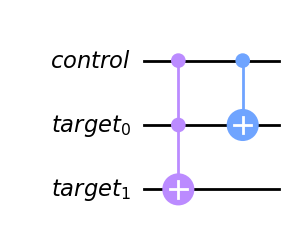

In [6]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO

cu.ccx(c,t[0],t[1])
cu.cx(c,t[0])


# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN

cu.draw('mpl')

y ejecuta la celda siguiente para verificar tu respuesta

¡Felicidades! Ya completaste la parte difícil. 

Midiendo los cúbits podemos leer la salida del algoritmo de estimación de la fase, así que tenemos que asegurarnos que nuestro registro de 'conteo', contiene suficientes cúbits para leer $r$. En nuestro caso, $r=4$, lo que significa que solo neecesitamos $\log_2(4) = 2$ cúbits (de nuevo haciendo trampa ya que conocemos $r$ de antemano), pero ya que Santiago tiene 5 cúbits, y solo utilisamos 2 para el registro 'target', utilizaremos los restantes 3 cúbits como nuestro registro de conteo.

Para hacer la estimación de fase sobre $U$, necesitamos crear un circuito que lleva a cabo  $U^{2^x}$ ($U$ repetida $2^x$ veces) para cada cúbit (con índice $x$) en nuestro registro de conteo de $n$ cúbits. En nuestro caso esto significa que necesitamos 3 circuitos que implementen:

$$ U, \; U^2, \; \text{y} \; U^4 $$

Así que el paso siguiente consiste en crear el circuito que lleva a cabo $U^2$ (i.e. un circuito equivalente a aplicar $U$ dos veces).

<div class="alert alert-block alert-success">

**Ejercicio 2b:** Crear un circuito ($U^2$) que lleve a cabo la transformación:

$$
\begin{aligned}
U|00\rangle &= |10\rangle \\
U|01\rangle &= |11\rangle \\
U|10\rangle &= |00\rangle \\
U|11\rangle &= |01\rangle \\
\end{aligned}
$$

y que esté controlado por otro cúbit. El circuito deberá actuar sobre un registro objetivo de 2 cúbits llamado 'target', y estará controlado por otro registro de un único cúbit llamado 'control'. Deberás asignar tu circuito final a la variable '`cu2`'.

</div>

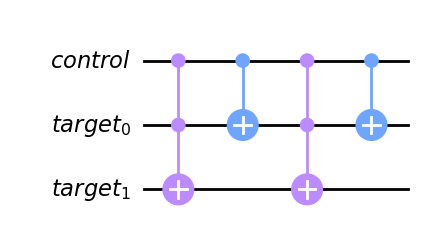

In [8]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO
cu2=cu.compose(cu)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN

cu2.draw('mpl')

y puedes verificar tu respuesta de la manera siguiente:





Finalmente, necesitamos también un circuito que sea equivalente a aplicar $U$ cuatro veces (i.e. necesitas el circuito $U^4$). 

<div class="alert alert-block alert-success">
    
**Ejercicio 2c:** Crear un circuito ($U^4$) que lleve a cabo la transformación:

$$
\begin{aligned}
U|00\rangle &= |00\rangle \\
U|01\rangle &= |01\rangle \\
U|10\rangle &= |10\rangle \\
U|11\rangle &= |11\rangle \\
\end{aligned}
$$

y que esté controlado por otro cúbit. El circuito deberá actuar sobre un registro objetivo de 2 cúbits llamado 'target', y estará controlado por otro registro de un único cúbit llamado 'control'. Deberás asignar tu circuito final a la variable '`cu4`'. _Pista: La mejor solución es la más simple._
</div>

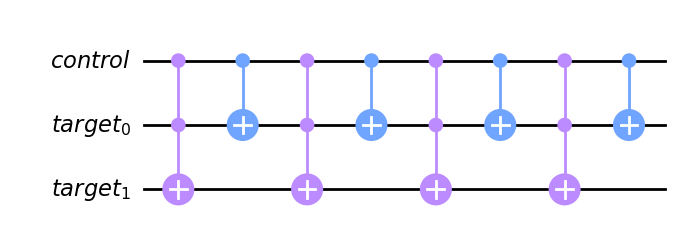

In [9]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS- INICIO

cu4 = cu2.compose(cu2)

# ESCRIBE TU CÓDIGO ENTRE ESTAS LÍNEAS - FIN


cu4.draw('mpl')

y puedes verificar tu respuesta de la manera siguiente:

<div class="alert alert-block alert-success">

**Ejercicio 2 - ejercicio final:** Ahora que tenemos la versión controlada de  $U$, $U^2$ y $U^4$, podemos combinarlas en un circuito que lleva a cabo la parte cuántica del algoritmo de Shor.

La preparación de los cúbits es fácil: necesitamos poner el registro de conteo en el estado $|{+}{+}{+}\rangle$ (que podemos obtener con tres compuertas H) y necesitamos que el registro 'target' esté en el estado $|1\rangle$ (el cual representamos con el estado $|00\rangle$ de la base computacional, así que no necesitamos hacer nada). Toda esta preparación la haremos por ti.

_Tu_ tarea es crear un circuito que lleve a cabo las compuertas controladas de $U$s, que serán usadas entre la preparación y la transformada de Fourier cuántica inversa. Formalemente, queremos un circuito:


$$
CU_{c_0 t}CU^2_{c_1 t}CU^4_{c_2 t}
$$

dónde $c_0$, $c_1$ y $c_2$ son tres cúbits en el registro de conteo, $t$ es el registro 'target' y $U$ está <a href="#u-definition">definida en la primera parte del ejercicio</a>. En esta notación, $CU_{a b}$ indica que $CU$ está controlada por $a$ y actúa sobre $b$. Una solución fácil a este problema es combinar los circuitos `cu`, `cu2` y `cu4` que creaste arriba, pero muy probablemente encontrarás un circuito más eficiente con el mismo comportamiento.

    
</div>

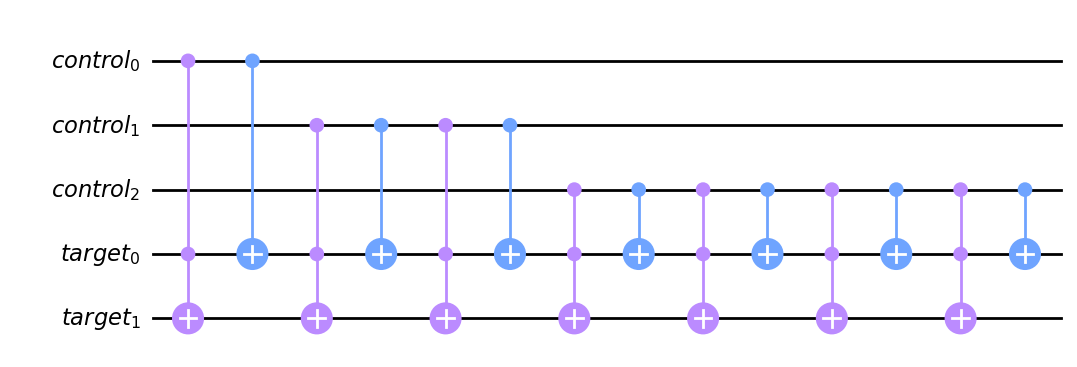

In [10]:
# Código para combinar tus soluciones previas en tu respuesta final
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
cux.draw('mpl')

## Usando tu circuito para factorizar 35

La celda de código siguiente recupera el circuito que enviaste en el ejercicio y lo utiliza para crear un circuito que nos dará $\tfrac{s}{r}$, dónde $s$ es un entero tomado aleatoriamente entre $0$ and $r-1$, y $r$ es el período de la función $$f(x) = 13^x \bmod 35.$$

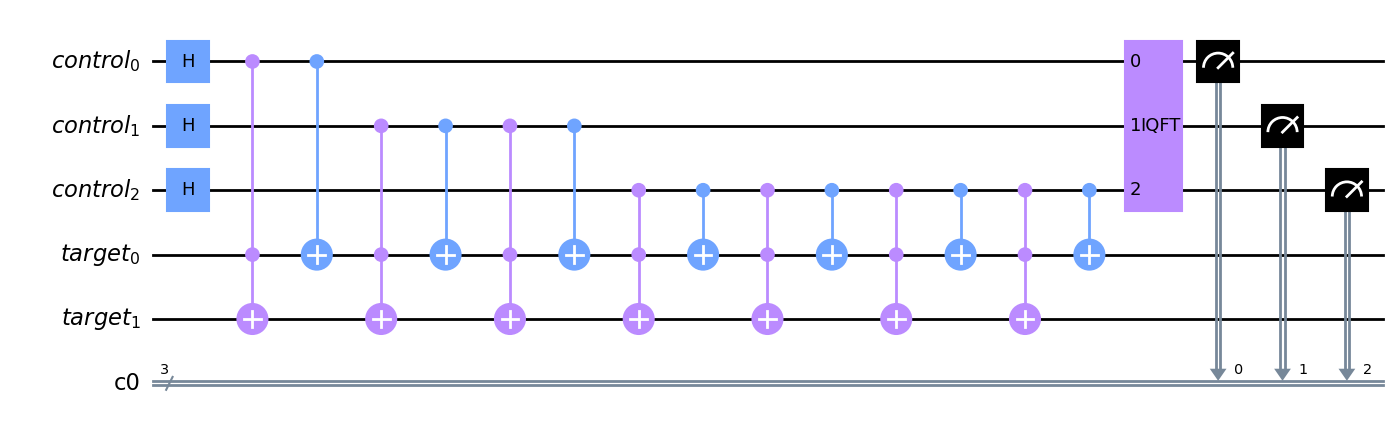

In [11]:
from qiskit.circuit.library import QFT
from qiskit import ClassicalRegister
# Crea un objeto tipo circuito
cr = ClassicalRegister(3)
shor_circuit = QuantumCircuit(cqr, tqr, cr)

# Prepara los cúbits
shor_circuit.h(cqr)

# Añade tu circuito
shor_circuit = shor_circuit.compose(cux)

# Calcula la transformada cuántica de Fourier inversa y extrae la salida
shor_circuit.append(QFT(3, inverse=True), cqr)
shor_circuit.measure(cqr, cr)
shor_circuit.draw('mpl')

Transpilemos el circuito y veamos que tan grande es y cuantas CNOTs utiliza:

In [12]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('aer_simulator')
tqc = transpile(shor_circuit, basis_gates=['u', 'cx'], optimization_level=3)
print(f"profundidad del circuito: {tqc.depth()}")
print(f"el circuito contiene {tqc.count_ops()['cx']} CNOTs")

profundidad del circuito: 88
el circuito contiene 44 CNOTs


Y veamos qué obtenemos

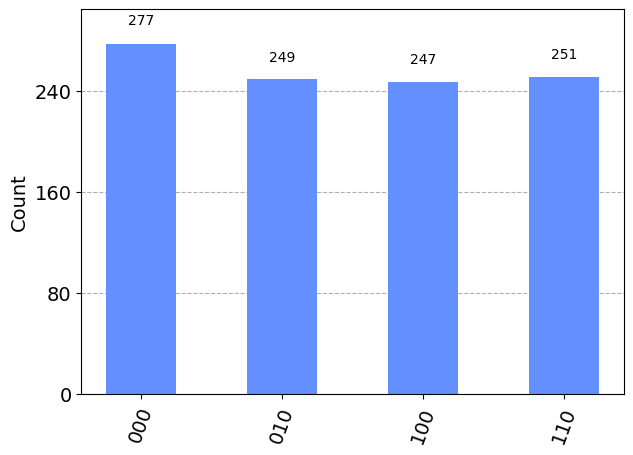

In [13]:
counts = qasm_sim.run(tqc).result().get_counts()
plot_histogram(counts)

Suponiendo que todo ha funcionado correctamente, deberíamos ver probabilidades iguales para medir los números $0$, $2$, $4$, $8$. Esto se debe a que la estimación de la fase nos da $2^n \cdot \tfrac{s}{r}$, donde $n$ es el número de cúbits en nuestro registro de conteo (aquí $n=3$, $s$ is un número aleatorio entre  $0$ y $r-1$, y $r$ es un número que estamos intentando calcular). Convirtamos esto en fracciones de $s/r$ (esto es algo que es fácil de calcular clásicamente):


In [14]:
from fractions import Fraction
n = 3  # n es el número de cúbits en el registro de conteo
# Bucle sobre cada valor de la medida
for measurement in counts.keys():
    # Convierte el código binario tipo string en 'int', y divide por 2^n
    decimal = int(measurement, 2)/2**n
    # Usando el algoritmos de fracciones continuas lo convertimos en la forma a/b
    print(Fraction(decimal).limit_denominator())

3/4
0
1/4
1/2


Podemos ver que el denominador de algunos resultados nos dirá cúal es la respuesta correcta $r = 4$. Podemos verificar $r=4$ rápidamente:

In [15]:
13**4 % 35

1

¿Pero de aquí cómo obtenemos los factores primos?  Existe así una alta probabilidad que el máximo común divisior de $N$, $a^{r/2}-1$ o $a^{r/2}+1$, sea un factor de $N$, y el máximo común divisor también se puede calcular clásicamente.


In [16]:
from math import gcd # máximo común divisor
for x in [-1, 1]:
    print(f"Valor estimado: {gcd(13**(4//2)+x, 35)}")

Valor estimado: 7
Valor estimado: 5


# En el siguiente enlace encontrarás el formulario para subir la respuesta de tu trabajo, recuerda que solo debes contestar una vez: https://forms.gle/YCazvhzGCP6UxghG6